# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [85]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [86]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)
library(rjson)

In [103]:
feat_df <- read.table("../../../output/annotations_MS1_MS2/PS_selected_full_report.csv"
        ,header = TRUE, sep = ',')
annot_evidence = c("LMSD","isotopes") # MS2, LMSD, isotopes
filtered_level = 0.05

In [111]:
str = paste0(annot_evidence, collapse = "_")

In [113]:
str = paste0(annot_evidence, collapse = "_")
out_dir = glue("../../../output/heatmap_{str}/")
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_pval{filtered_level}_heatmap.pdf"))

In [114]:
colnames(feat_df)

[1] "X"                        "mz"                      
 [3] "rtime"                    "rtime_left_base"         
 [5] "rtime_right_base"         "cSelectivity"            
 [7] "goodness_fitting"         "snr"                     
 [9] "annotation_evidence"      "name"                    
[11] "neutral_mass"             "formula"                 
[13] "isomers"                  "X.M.H.e."                
[15] "gMean_Tn"                 "gMean_CD8stem"           
[17] "gMean_CD8trans"           "gMean_CD8TD"             
[19] "log2FC_CD8stemvsTn"       "log2FC_CD8transvsTn"     
[21] "log2FC_CD8TDvsTn"         "log2FC_CD8transvsCD8stem"
[23] "log2FC_CD8TDvsCD8stem"    "log2FC_CD8TDvsCD8trans"  
[25] "f_score"                  "pval"                    
[27] "padj"                     "Tpadj_CD8TD.CD8stem"     
[29] "Tpadj_CD8trans.CD8stem"   "Tpadj_Tn.CD8stem"        
[31] "Tpadj_CD8trans.CD8TD"     "Tpadj_Tn.CD8TD"          
[33] "Tpadj_Tn.CD8trans"        "TFDR_CD8TD.CD8stem"      
[35] "TFDR_CD8trans.CD8stem"    "TFDR_Tn.CD8stem"         
[37] "TFDR_CD8trans.CD8TD"      "TFDR_Tn.CD8TD"           
[39] "TFDR_Tn.CD8trans"         "CD8TD_750K_1"            
[41] "CD8TD_750K_2"             "CD8stem_250K_1"          
[43] "CD8stem_300K_2"           "CD8trans_250K_2"         
[45] "CD8trans_350K_1"          "Tn_250K_1"               
[47] "Tn_250K_2"                "pooled_1"                
[49] "pooled_2"                 "pooled_3"

In [115]:
feat_df = feat_df[grepl(annot_evidence[1],feat_df[['annotation_evidence']]) & grepl(annot_evidence[2],feat_df[['annotation_evidence']]),]

In [116]:
head(feat_df)

,X,mz,rtime,rtime_left_base,rtime_right_base,cSelectivity,goodness_fitting,snr,annotation_evidence,name,neutral_mass,formula,isomers,X.M.H.e.,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,F4225,482.2890,217.67,215.07,220.28,1.00,0.98,3652,in-silico|isotopes|LMSD,LPS O-16:0,483.2961,C22H46NO8P,,482.2888,21.89478,21.89980,21.88164,21.63916,0.005020197,-0.01313396,-0.2556191,-0.01815415,-0.2606393,-0.2424851,0.5043478,0.69974609,0.7743694,0.742154498,0.99984328,0.99999668,0.77757329,0.75203891,0.99994056,1.0000000,1,1,1.0000000,1.0000000,1,21.70920,21.56912,22.12183,21.67776,22.07978,21.68351,22.07871,21.71085,22.32969,22.42693,22.40427
141,F6424,662.4426,206.41,203.83,208.75,1.00,0.95,4915,in-silico|isotopes|LMSD,PS O-28:1,663.4475,C34H66NO9P,PS O-28:1|LPS O-28:2;O,662.4402,21.94285,22.36054,22.34364,22.53081,0.417691117,0.40078696,0.5879605,-0.01690416,0.1702693,0.1871735,8.4331785,0.03331279,0.1679283,0.558121838,0.99887360,0.08402237,0.49412329,0.02807704,0.09486121,0.9679253,1,1,1.0000000,0.1965874,1,22.50262,22.55900,22.26737,22.45372,22.20622,22.48106,21.90982,21.97588,22.19773,22.29338,22.31581
360,F10212,790.5601,336.39,335.97,337.01,0.36,0.99,7,in-silico|isotopes|LMSD,PS 36:0,791.5676,C42H82NO10P,,790.5604,19.57409,19.69188,19.34974,19.07851,0.117785746,-0.22434984,-0.4955757,-0.34213559,-0.6133614,-0.2712258,0.6706544,0.61318503,0.7211829,0.601206461,0.87950439,0.99349238,0.93279893,0.72784023,0.95948000,0.9958315,1,1,1.0000000,1.0000000,1,19.57818,18.57885,19.85039,19.53337,19.75052,18.94896,19.55693,19.59125,19.44010,19.63443,19.18302
524,F12463,810.5288,308.94,306.47,311.51,0.95,0.96,37,in-silico|isotopes|LMSD|MS2,PS 38:4,811.5363,C44H78NO10P,,810.5291,25.10654,24.51033,25.03449,25.55799,-0.596205255,-0.07204810,0.4514513,0.52415715,1.0476566,0.5234994,14.4377327,0.01301773,0.1085200,0.009606254,0.09669417,0.06575320,0.09704589,0.14610287,0.96596335,0.1521046,1,1,0.4543163,0.4297257,1,25.52216,25.59381,24.64683,24.37383,25.20658,24.86240,25.06763,25.14544,24.88909,24.95856,24.84137
555,F13106,816.5760,336.39,333.91,338.86,0.48,0.93,9,in-silico|isotopes|LMSD,PS 38:1,817.5833,C44H84NO10P,,816.5760,21.70581,21.68354,21.55461,22.31139,-0.022274832,-0.15119738,0.6055746,-0.12892255,0.6278494,0.7567720,1.6347018,0.31582078,0.5175680,0.436845885,0.98401132,0.99991121,0.31509828,0.46141067,0.97491652,0.8633649,1,1,0.8325584,0.8437931,1,22.63770,21.98507,21.91985,21.44722,21.89120,21.21802,21.77268,21.63894,22.77855,22.32815,21.18955
563,F13329,818.5917,373.01,370.53,375.49,0.52,0.96,12,in-silico|isotopes|LMSD,PS 38:0,819.5989,C44H86NO10P,,818.5917,23.13744,23.30683,22.83252,22.91332,0.169394580,-0.30492025,-0.2241216,-0.47431483,-0.3935161,0.0807987,0.6225424,0.63680246,0.7348336,0.749722100,0.64458065,0.96856651,0.99625522,0.93320956,0.85661292,1.0000000,1,1,1.0000000,1.0000000,1,23.27347,22.55316,23.53582,23.07785,23.17353,22.49151,23.15941,23.11547,23.56301,22.92313,22.41170


In [117]:
feat_df = feat_df[!duplicated(feat_df$X),]

In [118]:
dim(feat_df)

[1] 26 50

In [119]:
library(dplyr)

feat_df = feat_df %>%
  mutate(surrogate = paste(name, round(rtime,2), sep = "_"))

rownames(feat_df) = feat_df$surrogate

In [120]:
rownames(feat_df)[1:5]

[1] "LPS O-16:0_217.67" "PS O-28:1_206.41"  "PS 36:0_336.39"   
[4] "PS 38:4_308.94"    "PS 38:1_336.39"

In [121]:
meta_df <- read.table("../../../../seq/RPneg_addgrp.csv",
                     header = TRUE, sep = ',') 

In [122]:
head(meta_df,5)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2


In [123]:
sample_names = colnames(feat_df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

[1] 8

[1] "padj"                   "Tpadj_CD8TD.CD8stem"    "Tpadj_CD8trans.CD8stem"
[4] "Tpadj_Tn.CD8stem"       "Tpadj_CD8trans.CD8TD"   "Tpadj_Tn.CD8TD"        
[7] "Tpadj_Tn.CD8trans"

In [124]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [125]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[meta_df$Sample_ID_upd %in% sample_names,]

# Filter data

In [126]:
feat_df.filt = feat_df[feat_df$pval < filtered_level & !is.na(feat_df$pval),]

In [127]:
dim(feat_df.filt)

[1] 17 51

## subset datatable with only data values

In [128]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [129]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [130]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.633637  1.990296

#### columns and rows annotation

In [131]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [132]:
unique(meta_df$group)

[1] "Tn"       "CD8stem"  "CD8trans" "CD8TD"

## Since the metadata is not exclusively the data 

In [133]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [134]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [135]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'group') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [136]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'group')

In [137]:
annotation_col = data.frame(group = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [138]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [139]:
annotation_col$group

[1] "CD8TD"    "CD8TD"    "CD8stem"  "CD8stem"  "CD8trans" "CD8trans" "Tn"      
[8] "Tn"

#### Annotation of rows (here don't have these)

In [140]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [141]:
group = c("#888888","#0000ff","#FFA500","#ff0000")
names(group) = c("Tn","CD8stem","CD8trans","CD8TD")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [142]:
ann_colors = list(group = group)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [143]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.633637  1.990296

In [144]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2.1
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2.1

In [145]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.633637  1.990296

In [146]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [147]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [148]:
ann_colors

$group
       Tn   CD8stem  CD8trans     CD8TD 
"#888888" "#0000ff" "#FFA500" "#ff0000"

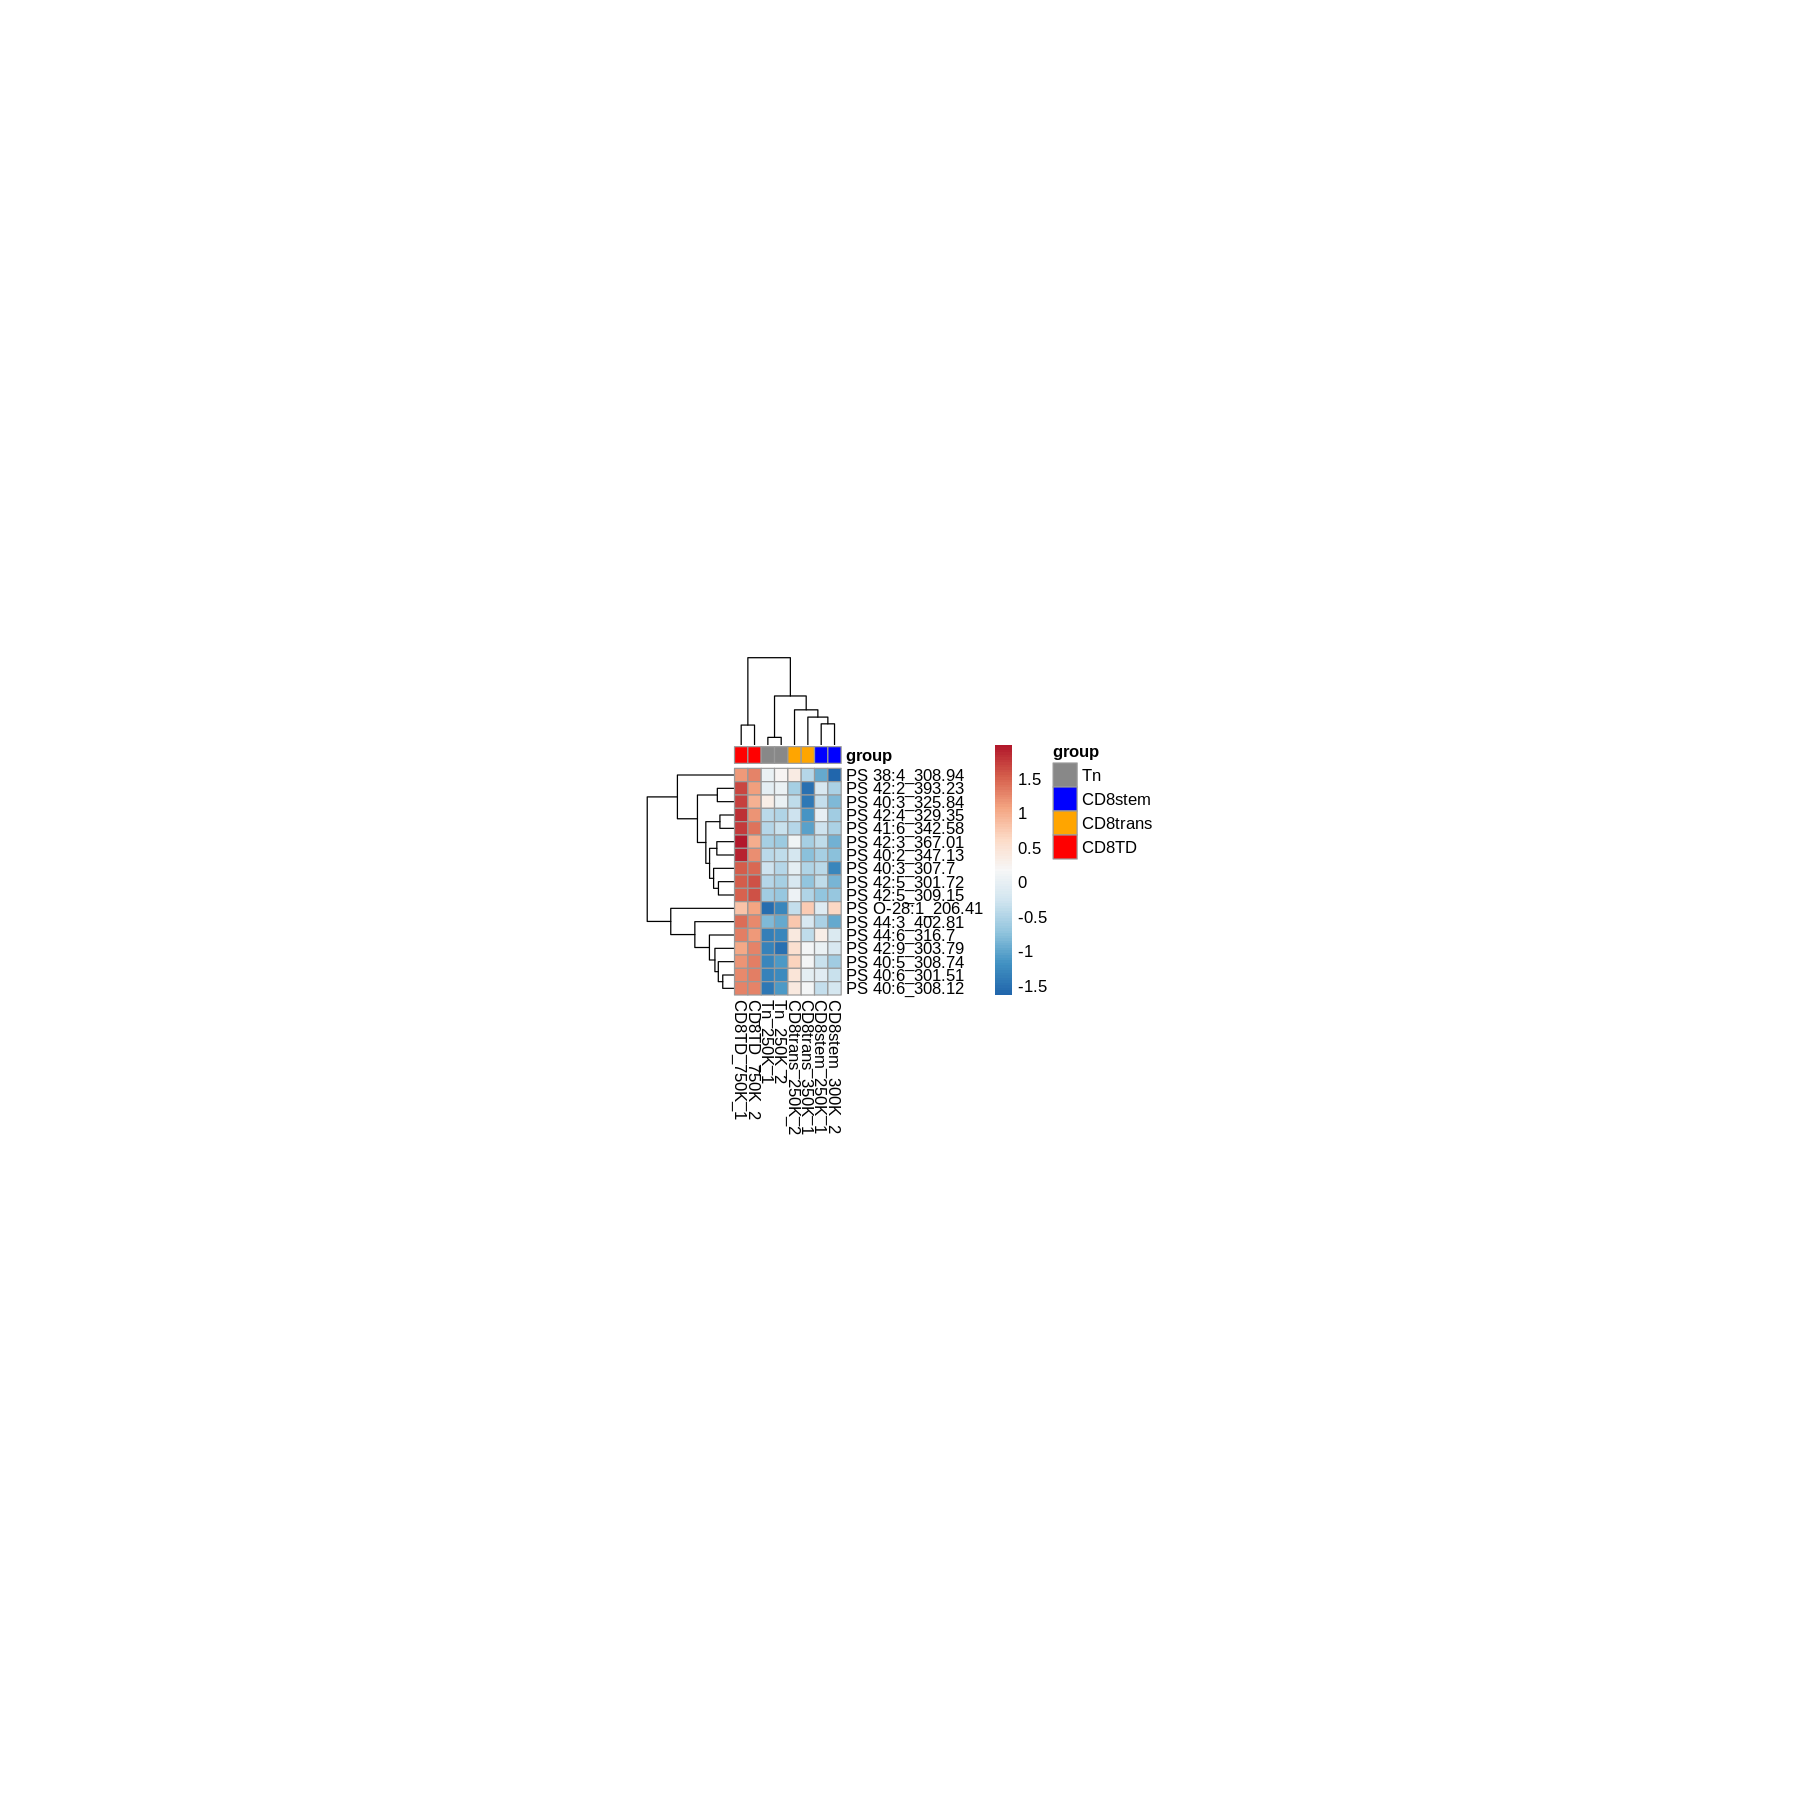

In [149]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----